# Linear Regression From First Principles

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Không sklearn

Tìm w và b = gradient decent
> 1 feature

In [53]:
import numpy as np

X = np.array([50, 60, 80, 100])
y = np.array([1500, 1800, 2400, 3000])

w = 0
b = 0
lr = 0.0001
n = len(X)
# ta có thể đặt điều kiện để kiểm soát loss, ở đây chỉ set nó chạy 1000 lần xong dừng và có 3 cách
# 1. dừng khi loss không còn giảm đáng kể:
# if abs(loss_prev - loss) < 1e-6:
#     break
# 2. Dừng khi gradient rất nhỏ:
# if abs(dw) < 1e-6 and abs(db) < 1e-6:
#     break
# cách 3: Dừng khi loss bắt đầu tăng
# if loss > loss_prev:
#     break

for epoch in range(1000):
    y_hat = w * X + b
    dw = (2/n) * np.sum((y_hat - y) * X)
    db = (2/n) * np.sum(y_hat - y)

    w = w - lr * dw
    b = b - lr * db

print("w:", w)
print("b:", b)

# Dự doan
X_new = np.array([55,66,70,100])
y_pred = w * X_new + b
print("y_new:", y_pred)

w: 29.995081903810384
b: 0.38157198222924055
y_new: [1650.11107669 1980.05697763 2100.03730525 2999.88976236]


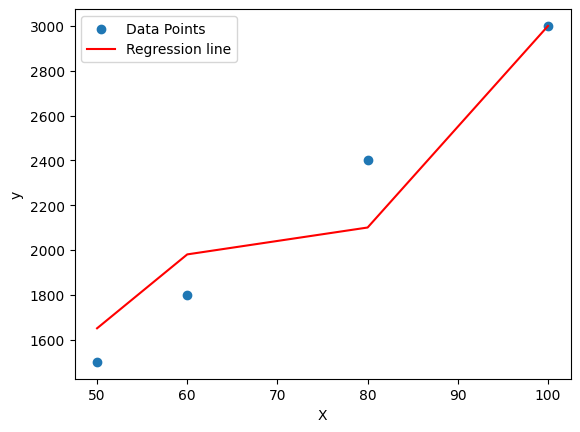

In [55]:
plt.figure()
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred,color = 'r', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Tìm w và b = gradient decent
> n feature

In [66]:
X = np.array([
    [50, 2],   # diện tích, số phòng
    [60, 2],
    [80, 3],
    [100, 4]
])

w = 0
b = 0
lr = 0.0001

y = np.array([1500, 1800, 2400, 3000])
n,m = X.shape
w = np.zeros(m)   # gắn liền với cột
for epoch in range(1000):
    y_hat = X @ w + b
    dw = (2/n) * (X.T @ (y_hat - y))
    db = (2/n) * np.sum(y_hat - y)

    w = w - lr * dw
    b = b - lr * db

print("w:", w)
print("b:", b)

# Dự doan
X_new = np.array([
    [55, 2],
    [70, 3],
    [90, 4],
    [90, 4]
])
y_pred = X_new @ w + b
print("y_new:", y_pred)

w: [29.95148876  1.13908779]
b: 0.385803294345656
y_new: [1649.99586073 2100.40727993 2700.57614294 2700.57614294]


Khi n feature không thể vẽ scatter +line => chọn 1 feature hoặc vẽ 3d
> `X[:, 0].shape = (4,)`

> `y.shape = (4,)`

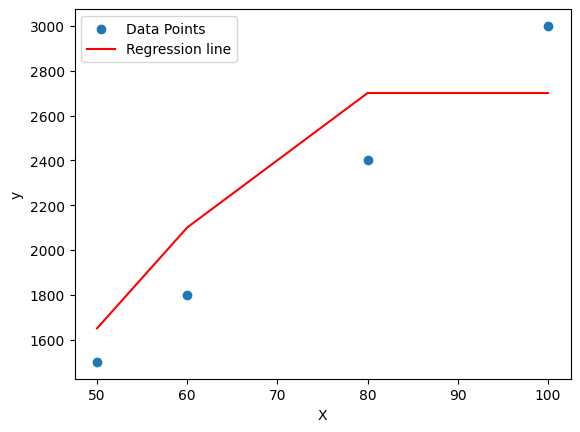

In [68]:
plt.figure()
plt.scatter(X[:,0], y, label='Data Points')
plt.plot(X[:,0], y_pred,color = 'r', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

---

## 2. Với sklearn

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [70]:
df = pd.read_csv('salary_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [73]:
df['YearsExperience'].shape

(30,)

> => Cần reshape

In [71]:
X = df['YearsExperience'].values
y = df['Salary'].values

Chia X và y xong thì mới được reshape(nếu X là 1D)

In [77]:
X = X.reshape(-1, 1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  28344.33739450406
Coefficient:  [9162.71545776]


In [83]:
y_pred = model.predict(X_test)
print(y_pred)

[116306.40578904  73241.64313755 103478.60414817  76906.72932065
  57665.02685935  62246.38458823 122720.30660948 108059.96187705
  64995.19922556  38423.32439804  48502.31140159  75074.1862291
  54916.21222202  65911.47077134  64995.19922556]


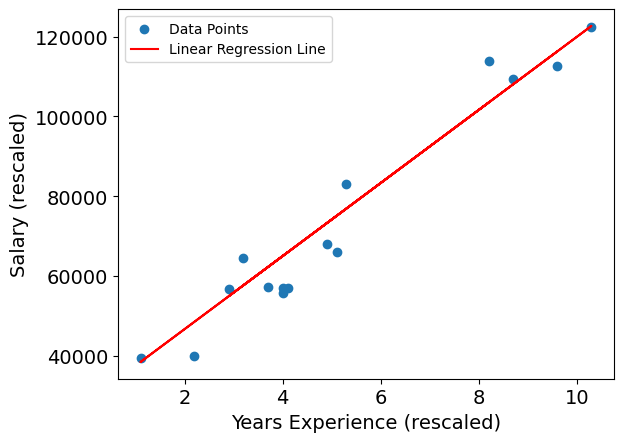

In [85]:
plt.scatter(X_test,y_test, label='Data Points')
plt.plot(X_test, y_pred, 'Red', label = 'Linear Regression Line')
plt.xlabel('Years Experience (rescaled)', fontsize = 14)
plt.ylabel('Salary (rescaled)', fontsize = 14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend()
plt.show()

---

Một số lưu ý:

1. dùng khi có mối quan hệ tuyến tính nhưng tránh tuyến tính quá cao vì đa cộng tuyến

2. Nhớ xử lý ngoại lai

3. Nên dùng StandardScaler để chuẩn hóa



```
# End of beginning
```

